In [40]:
#Importing libraries

In [41]:
import numpy as np
import pandas as pd

In [42]:
#Reading Data

In [43]:
retail = pd.read_csv("Online Retail-1.csv")

In [44]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [45]:
features = ["Quantity", "UnitPrice", "CustomerID", "Country"]

In [46]:
retail = retail.dropna(subset=features)

In [47]:
data = retail[features].copy()

In [48]:
data

,Quantity,UnitPrice,CustomerID,Country
0,6,2.55,17850.0,United Kingdom
1,6,3.39,17850.0,United Kingdom
2,8,2.75,17850.0,United Kingdom
3,6,3.39,17850.0,United Kingdom
4,6,3.39,17850.0,United Kingdom
...,...,...,...,...
541904,12,0.85,12680.0,France
541905,6,2.10,12680.0,France
541906,4,4.15,12680.0,France
541907,4,4.15,12680.0,France


In [49]:
#Categorical to numerical

In [50]:
data['Country'].replace(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany', 'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal', 'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland', 'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria', 'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore', 'Lebanon', 'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community', 'Malta', 'RSA'],
                        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37], inplace=True)

In [51]:
data

,Quantity,UnitPrice,CustomerID,Country
0,6,2.55,17850.0,0
1,6,3.39,17850.0,0
2,8,2.75,17850.0,0
3,6,3.39,17850.0,0
4,6,3.39,17850.0,0
...,...,...,...,...
541904,12,0.85,12680.0,1
541905,6,2.10,12680.0,1
541906,4,4.15,12680.0,1
541907,4,4.15,12680.0,1


In [52]:
data.describe()

,Quantity,UnitPrice,CustomerID,Country
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,0.770095
std,248.693370,69.315162,1713.600303,3.104163
min,-80995.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13953.000000,0.000000
50%,5.000000,1.950000,15152.000000,0.000000
75%,12.000000,3.750000,16791.000000,0.000000
max,80995.000000,38970.000000,18287.000000,37.000000


In [53]:
#Pseudo Code
#1. Scale the data
#2. Initialize random centroids
#3. Find eucledian distance
#4. Generate new centroids
#5. Iterate and plot clusters

In [54]:
#Min max scaling

In [55]:
data_updated = ((data - data.min())/(data.max()-data.min())) * 10 + 1

In [56]:
data_updated.head()

,Quantity,UnitPrice,CustomerID,Country
0,6.000370,1.000654,10.264434,1.0
1,6.000370,1.000870,10.264434,1.0
2,6.000494,1.000706,10.264434,1.0
3,6.000370,1.000870,10.264434,1.0
4,6.000370,1.000870,10.264434,1.0


In [57]:
#Initializing centroids

In [58]:
def main(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [59]:
centroids = main(data_updated, 5)

In [60]:
#Find Eucledian distance and label data

In [61]:
def get_labels(data, centroids):
    euclidean_distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return euclidean_distances.idxmin(axis=1)

In [62]:
label = get_labels(data_updated, centroids)

In [63]:
#Genrate new centroids

In [64]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [65]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [66]:
#Performing PCA algorithm for plotting multiple features

In [67]:
def perform_pca(data, n_components=2):
    centered_data = data - np.mean(data, axis=0)
    covariance_matrix = np.cov(centered_data, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    selected_eigenvectors = sorted_eigenvectors[:, :n_components]
    transformed_data = np.dot(centered_data,selected_eigenvectors)
    return transformed_data

In [68]:
#Plot Clusters

In [69]:
def plot_clusters_with_pca(data, labels, centroids, iteration):
    data_2d = perform_pca(data)
    centroids_2d = perform_pca(centroids.T)
    clear_output(wait=True) 
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=labels)
    plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

In [70]:
#Plotting clustering for k=2

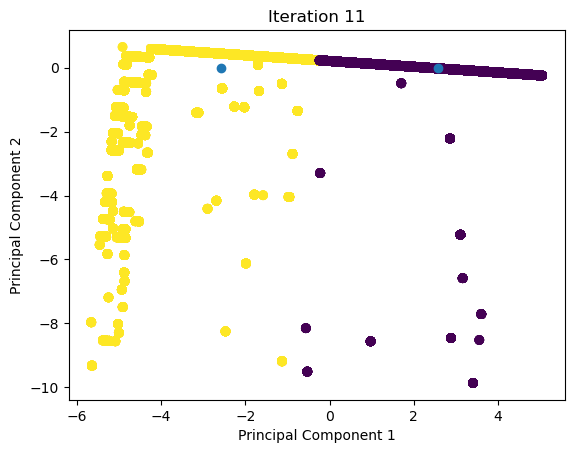

In [ ]:
max_iterations = 100
centroid_count = 2

centroids = main(data_updated, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data_updated, centroids)
    centroids = new_centroids(data_updated, labels, centroid_count)
    plot_clusters_with_pca(data_updated, labels, centroids, iteration)
    iteration += 1

In [ ]:
#Plotting clustering for k=3

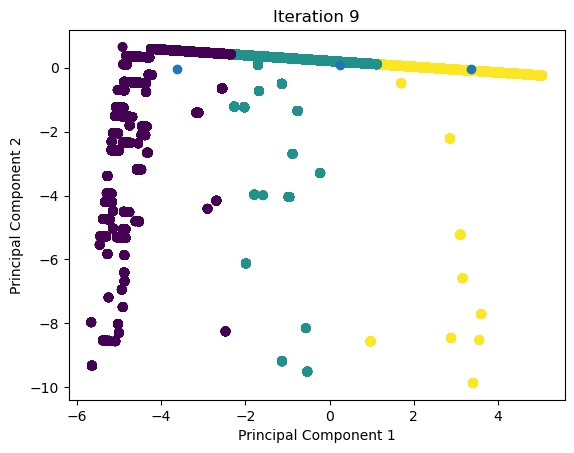

In [38]:
max_iterations = 100
centroid_count = 3

centroids = main(data_updated, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data_updated, centroids)
    centroids = new_centroids(data_updated, labels, centroid_count)
    plot_clusters_with_pca(data_updated, labels, centroids, iteration)
    iteration += 1

In [ ]:
#Plotting clustering for k=4

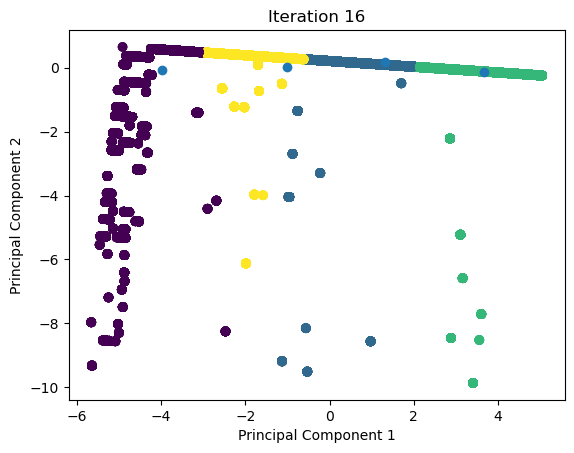

In [39]:
max_iterations = 100
centroid_count = 4

centroids = main(data_updated, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data_updated, centroids)
    centroids = new_centroids(data_updated, labels, centroid_count)
    plot_clusters_with_pca(data_updated, labels, centroids, iteration)
    iteration += 1